In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [30]:
seed = 42
np.random.seed(seed)

### Noisy boolean AND function

Base de dados gerada a partir da função de uma porta lógica AND com ruído Gaussiano adicionado aos atributos.

In [31]:
# Number of examples.
N = 10000

# Attributes.
x1 = np.random.randint(0, 2, N)
x2 = np.random.randint(0, 2, N)

# AND.
y = x1 & x2

# Noisy attributes.
x1 = x1 + 0.1*np.random.randn(N,)
x2 = x2 + 0.1*np.random.randn(N,)

# Attribute matrix.
X = np.c_[x1, x2]

### Generating the classes

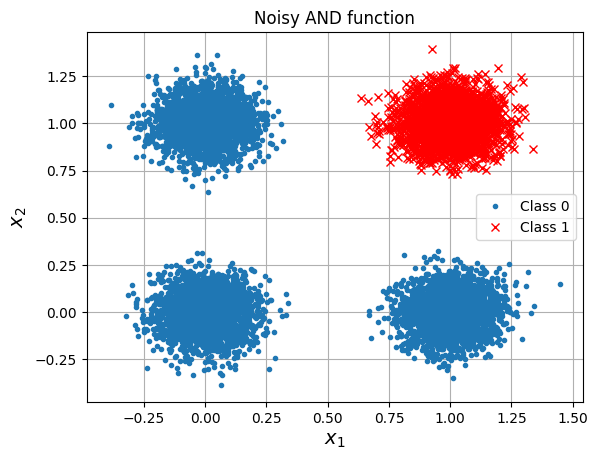

In [32]:
idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)

plt.plot(x1[idx0], x2[idx0], '.', label='Class 0')
plt.plot(x1[idx1], x2[idx1], 'rx', label='Class 1')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.title('Noisy AND function')
plt.legend()
plt.grid()
#plt.savefig('noisy_and_gate.png', dpi=600)
plt.show()

### Split dataset into training and test sets

In [33]:
# Split dataset into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

### Train the perceptron

In [34]:
# Instantiate.
per = Perceptron(random_state=seed)

# Train.
per.fit(X_train, y_train)

# Predict.
y_pred_train = per.predict(X_train)
y_pred_test = per.predict(X_test)

# Calculate accuracy.
acc_train = accuracy_score(y_pred_train, y_train)
acc_test = accuracy_score(y_pred_test, y_test)

print('Train accuracy: ', acc_train)
print('Test accuracy: ', acc_test)

Train accuracy:  1.0
Test accuracy:  0.9993333333333333


### Decision regions

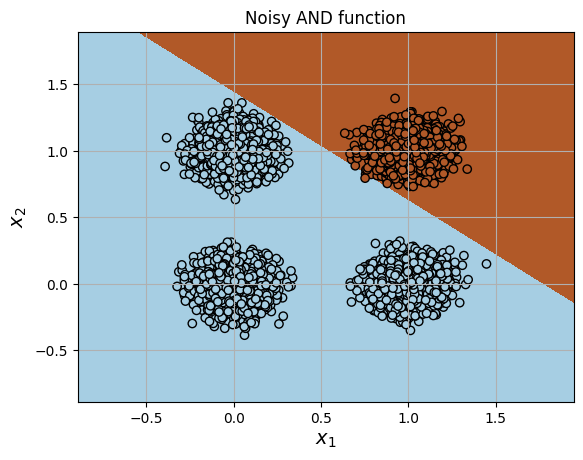

In [35]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x1.min() - .5, x1.max() + .5
y_min, y_max = x2.min() - .5, x2.max() + .5
h = .002  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = per.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto')

# Plot also the training points
plt.scatter(x1, x2, c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.grid()

plt.title('Noisy AND function')
#plt.savefig('noisy_and_gate_boundary.png', dpi=600)
plt.show()

### Confusion matrix

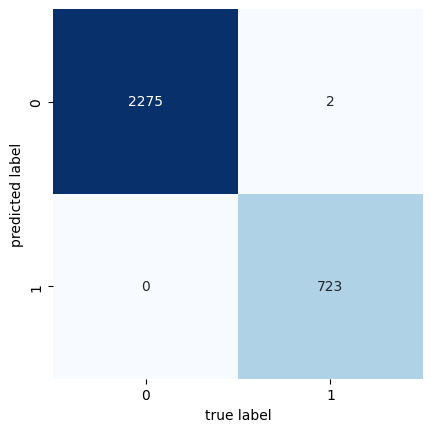

In [36]:
# Plot the confusion matrix
mat = confusion_matrix(y_test, y_pred_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1'], yticklabels=['0','1'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

### Classification metrics

In [37]:
print(classification_report(y_test, y_pred_test, digits=4))

              precision    recall  f1-score   support

           0     0.9991    1.0000    0.9996      2275
           1     1.0000    0.9972    0.9986       725

    accuracy                         0.9993      3000
   macro avg     0.9996    0.9986    0.9991      3000
weighted avg     0.9993    0.9993    0.9993      3000

